In [3]:
## Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix

In [4]:
# read the dataset
df=pd.read_csv("dataset.csv")
df.head() # displays first 5 rows of dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [9]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


price_range
1    0.25
2    0.25
3    0.25
0    0.25
Name: proportion, dtype: float64


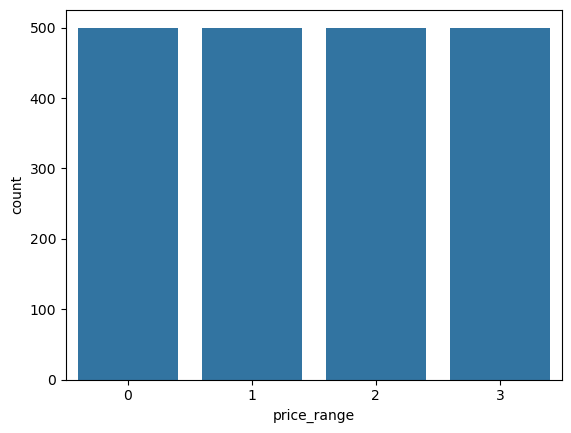

In [10]:
# checking if the target feature is balanced and the plotting
print(df['price_range'].value_counts(normalize=True))
sns.countplot(x='price_range',data=df)
plt.show()

In [11]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [12]:
# train the model
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [13]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1400, 20)
X_test: (600, 20)
Y_train: (1400,)
Y_test: (600,)


In [14]:
# standardization
sc=StandardScaler()
x_trainn=sc.fit_transform(x_train)
x_testt=sc.transform(x_test)

# Applying K-Nearest Neighbor Algorithm(KNN)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_trainn,y_train)

KNeighborsClassifier()

In [18]:
# prediction
y_pred=classifier.predict(x_testt)
y_pred

array([0, 1, 0, 2, 1, 1, 1, 0, 3, 1, 0, 0, 1, 3, 2, 2, 3, 3, 0, 0, 0, 1,
       0, 1, 0, 1, 3, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 0, 3, 0, 0, 2, 3, 0,
       2, 0, 1, 2, 3, 0, 1, 0, 1, 0, 1, 2, 3, 2, 0, 1, 0, 2, 2, 2, 0, 1,
       3, 3, 2, 3, 1, 3, 0, 2, 2, 1, 1, 3, 2, 1, 1, 0, 1, 1, 0, 3, 1, 3,
       3, 0, 3, 3, 3, 2, 3, 1, 1, 3, 1, 1, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 2, 2, 2, 3, 2, 0, 2, 1, 1, 3, 1, 3, 1, 0, 2, 1, 2, 2, 0,
       1, 2, 1, 2, 1, 1, 0, 2, 1, 1, 3, 2, 1, 0, 1, 0, 2, 2, 3, 0, 1, 0,
       3, 3, 0, 1, 0, 1, 3, 2, 2, 1, 2, 0, 0, 3, 3, 2, 2, 0, 1, 1, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 0, 1, 3, 2, 2, 0, 0, 1, 1, 0, 3, 3, 2, 0, 0,
       1, 0, 1, 1, 1, 3, 2, 1, 0, 2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 1, 0, 1,
       2, 1, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 3, 2, 0, 0, 3, 3, 0, 2, 2,
       1, 3, 0, 2, 1, 1, 2, 1, 1, 3, 0, 3, 3, 2, 2, 2, 1, 2, 3, 1, 2, 2,
       1, 2, 2, 1, 1, 3, 1, 3, 1, 2, 0, 1, 1, 3, 2, 1, 2, 1, 0, 3, 1, 3,
       1, 0, 1, 0, 2, 1, 2, 2, 0, 1, 1, 0, 0, 3, 2,

In [19]:
cf=confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cf)

Confusion Matrix:
 [[110  35   6   0]
 [ 44  68  30   4]
 [  9  58  59  22]
 [  4  18  62  71]]


In [20]:
labels=classifier.classes_
labels

array([0, 1, 2, 3], dtype=int64)

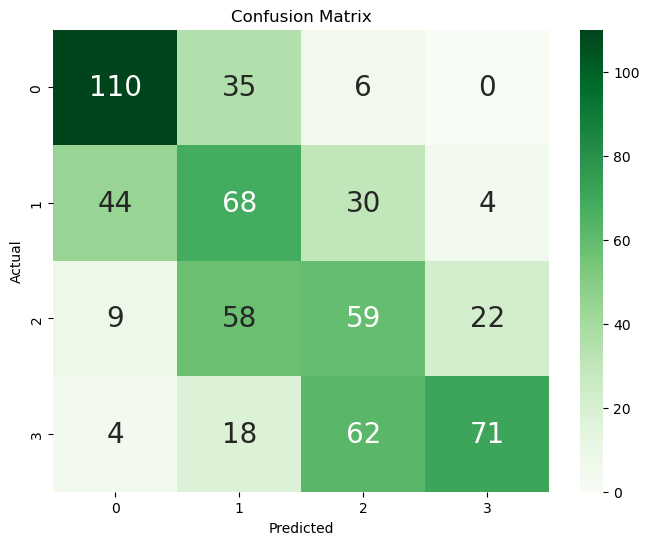

In [21]:
fig,ax=plt.subplots(figsize=(8,6))
sns.heatmap(cf,annot=True,annot_kws={"size":20},fmt='d',cmap="Greens",xticklabels=labels,yticklabels=labels,ax=ax)
ax.set_title("Confusion Matrix")
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score,classification_report
print("Accuracy: ",accuracy_score(y_test,y_pred))
print("Classification report:\n",classification_report(y_test,y_pred))

Accuracy:  0.5133333333333333
Classification report:
               precision    recall  f1-score   support

           0       0.66      0.73      0.69       151
           1       0.38      0.47      0.42       146
           2       0.38      0.40      0.39       148
           3       0.73      0.46      0.56       155

    accuracy                           0.51       600
   macro avg       0.54      0.51      0.52       600
weighted avg       0.54      0.51      0.52       600



In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [66]:
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [68]:
y_pred_rf = rf.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8683333333333333


# Bagging Classifier

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
base_model1=DecisionTreeClassifier()
bagging = BaggingClassifier(estimator=base_model1, n_estimators=200, random_state=0)
bagging.fit(x_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=0)

In [49]:
y_pred_bagging = bagging.predict(x_test)
print("Bagging Accuracy:", accuracy_score(y_test, y_pred_bagging))

Bagging Accuracy: 0.8933333333333333


In [51]:
# new input
new_data = {
    'battery_power': 1500,
    'blue': 1,
    'clock_speed': 1.8,
    'dual_sim': 1,
    'fc': 8,
    'four_g': 1,
    'int_memory': 32,
    'm_dep': 0.5,
    'mobile_wt': 150,
    'n_cores': 4,
    'pc': 13,
    'px_height': 800,
    'px_width': 1200,
    'ram': 4096,
    'sc_h': 14,
    'sc_w': 7,
    'talk_time': 15,
    'three_g': 1,
    'touch_screen': 1,
    'wifi': 1
}

# Convert dict to DataFrame
new_df = pd.DataFrame([new_data])  # Note the list wrapper around the dict

# Transform using scaler
scaled_data = sc.transform(new_df)  

# Predict
prediction = classifier.predict(scaled_data)

# Map and print
label_map = {0: 'Low', 1: 'Medium', 2: 'High', 3: 'Very High'}
print("Predicted Price Category:", label_map[prediction[0]])


Predicted Price Category: Very High


C:\Users\HOME\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
